In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
imdb = pd.read_csv('/content/drive/MyDrive/data/IMDB Dataset.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
text = imdb['review'][0]
print(text)
print("<==========>")
print(word_tokenize(text))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [11]:

corpus = []
for text in imdb['review']:
  words = [word.lower() for word in word_tokenize(text)]
  corpus.append(words)

In [12]:
num_words = len(corpus)
print(num_words)

50000


In [13]:
imdb.shape

(50000, 2)

In [14]:
train_size = int(imdb.shape[0]*0.8)
x_train = imdb.review[:train_size]
y_train = imdb.sentiment[:train_size]

x_test = imdb.review[train_size:]
y_test = imdb.sentiment[train_size:]

In [15]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen=128, truncating='post', padding='post')


In [16]:
x_train[0], len(x_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [17]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=128, truncating='post', padding='post')

In [18]:
x_test[0], len(x_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35787,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [19]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


In [20]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128, trainable=True))
model.add(LSTM(100, dropout=0.1, return_sequences=True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=[x_test, y_test])

Epoch 1/5
625/625 [==============================] - 285s 450ms/step - loss: 0.4363 - accuracy: 0.7949 - val_loss: 0.3352 - val_accuracy: 0.8588
Epoch 2/5
625/625 [==============================] - 265s 424ms/step - loss: 0.2431 - accuracy: 0.9078 - val_loss: 0.3791 - val_accuracy: 0.8350
Epoch 3/5
625/625 [==============================] - 265s 423ms/step - loss: 0.1605 - accuracy: 0.9441 - val_loss: 0.4600 - val_accuracy: 0.8483
Epoch 4/5
625/625 [==============================] - 268s 428ms/step - loss: 0.1038 - accuracy: 0.9654 - val_loss: 0.5105 - val_accuracy: 0.8491
Epoch 5/5
625/625 [==============================] - 266s 425ms/step - loss: 0.0801 - accuracy: 0.9742 - val_loss: 0.4705 - val_accuracy: 0.8276


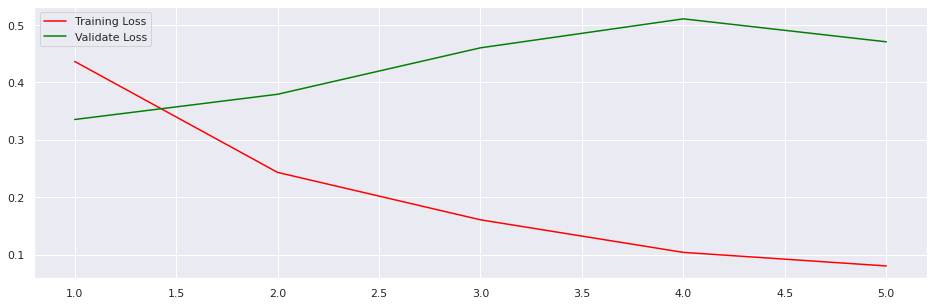

In [24]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validate Loss', color='green')
plt.legend()
plt.show()

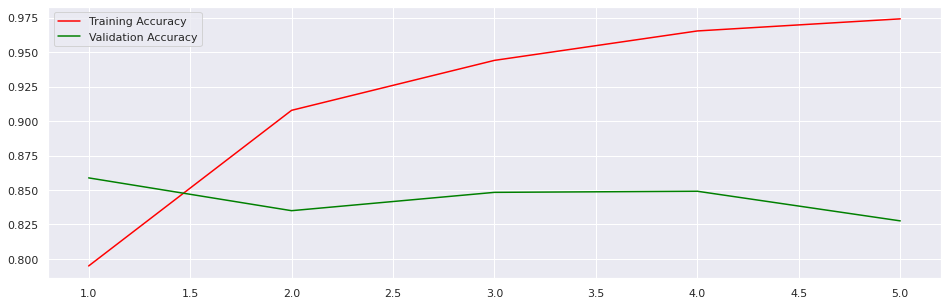

In [25]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy', color='green')
plt.legend()
plt.show()

In [45]:
validation_sentence = ['This movie is wonderful, I Love it.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding='post')

print(validation_sentence[0])
print("Probability of Positive: {}" .format(model.predict(validation_sentence_padded)[0]))

This movie is wonderful, I Love it.
Probability of Positive: [0.98574543]


In [46]:
validation_sentence = ['Waste of time and money. Not at all a good movie.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding='post')

print(validation_sentence[0])
print("Probability of Positive: {}" .format(model.predict(validation_sentence_padded)[0]))


Waste of time and money. Not at all a good movie.
Probability of Positive: [0.02356273]
